<a href="https://colab.research.google.com/github/SantiagoFra/Sleep-Analytics/blob/main/sleeping_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISIS DE DATOS CON PYTHON


Para este análisis de datos quise responder a unas preguntas que se me ocurrieron a la hora de ver el dataset.


*   ¿Existe una correlación entre el nivel de actividad física diaria y la calidad del sueño?
*   ¿Cómo varía la calidad del sueño entre diferentes grupos de edad?
*   ¿Las personas con hábitos alimenticios saludables tienden a tener una mejor calidad de sueño que aquellas con hábitos menos saludables?
*   ¿Las personas que toman medicamentos tienen peor calidad de sueño que aquellas que no los toman?





Lo primero que hago es añadir las librerías a utilizar: Pandas, Seaborn y Matplotlib

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Leo mi dataset en formato csv y lo almaceno en la variable df, procedo a mostrar un poco del dataset.

In [6]:
df = pd.read_csv('sleep.csv')

In [16]:
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Physical_numeric,Age_Group
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no,2,20-30
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes,1,30-40
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no,3,20-30
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no,1,40+
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no,3,20-30


Para encontrar errores en las variables categóricas y numéricas, muestro los valores únicos de cada columna y veo si es que hay algún tipo de error en los mismos.

In [8]:
for column in df.columns:
  print(f"{column}': {df[column].unique()}")

User ID': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
Age': [25 34 29 41 22 37 30 45 27 32 50 23 36 48 28 31 26 39 33 42 35 40 47 44
 38 49 24 46 43]
Gender': ['f' 'm']
Sleep Quality': [8 7 9 5 6 4]
Bedtime': ['23:00' '00:30' '22:45' '01:00' '23:30' '00:15' '22:30' '01:30' '00:45'
 '22:00' '22:15' '23:45' '01:15' '23:15']
Wake-up Time': ['06:30' '07:00' '06:45' '07:15' '06:00' '07:30' '06:15']
Daily Steps': [ 8000  5000  9000  4000 10000  6000  8500  3000  9500  6500  3500 11000
  7000  5500 10500]
Calories Burned': [2500 2200 2700 2100 2800 2300 2600 2000 2750 2400 2900]
Physical Activity Level': ['medium' 'low' 'high']
Dietary 

Al no haber ningún error en las columnas, puedo continuar con mi análisis. Para responder a la primera pregunta:<br>
¿Existe una correlación entre el nivel de actividad física diaria y la calidad del sueño? <br>
Creo un diccionario que permite asociar la actividad física con números para poder crear una nueva columna con los mismos.


In [9]:
activity_mapping = {
    'low': 1,
    'medium': 2,
    'high': 3
}

df['Physical_numeric'] = df['Physical Activity Level'].map(activity_mapping)

Creo un gráfico de dispersión que me permite obtener la correlación entre la actividad física y la calidad de sueño.

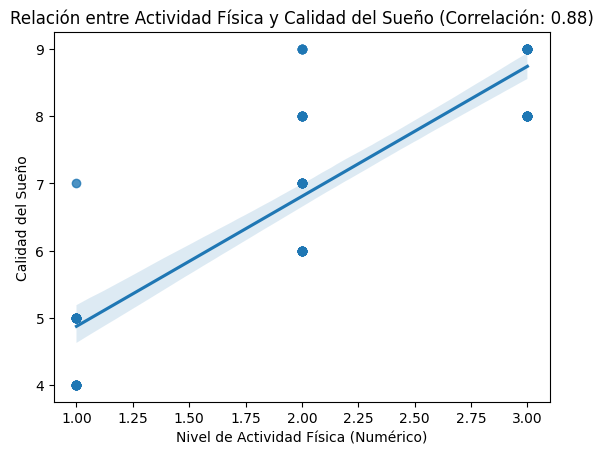

In [10]:
correlation = df['Physical_numeric'].corr(df['Sleep Quality'])

sns.regplot(x='Physical_numeric', y='Sleep Quality', data=df)
plt.title(f'Relación entre Actividad Física y Calidad del Sueño (Correlación: {correlation:.2f})')
plt.xlabel('Nivel de Actividad Física (Numérico)')
plt.ylabel('Calidad del Sueño')
plt.show()

Creo una función que me permite agrupar las edades de las personas en distintos grupos para comparar la calidad del sueño en estos grupos. Creo una nueva columna 'Age_group' con estos grupos.

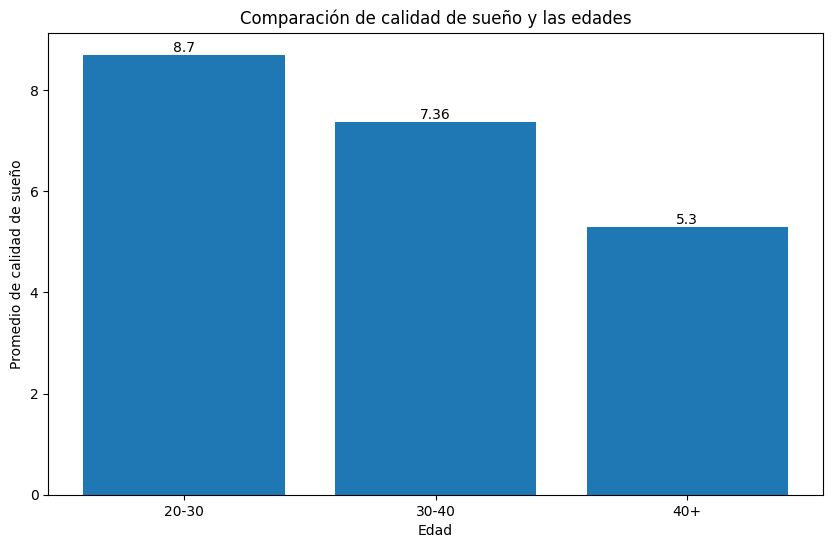

In [11]:
def age_group(age):
  if 20 <= age < 30:
    return '20-30'
  elif 30 <= age < 40:
    return '30-40'
  elif age >= 40:
    return '40+'
  else:
    return 'Otro'

df['Age_Group'] = df['Age'].apply(age_group)

promedio = df.groupby('Age_Group')['Sleep Quality'].mean()

plt.figure(figsize=(10, 6))
bars= plt.bar(promedio.index, promedio.values)
plt.title('Comparación de calidad de sueño y las edades')
plt.xlabel('Edad')
plt.ylabel('Promedio de calidad de sueño')

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Aquí simplemente creo un gráfico de torta donde se aprecia la proporción de personas de acuerdo a sus hábitos alimenticios.

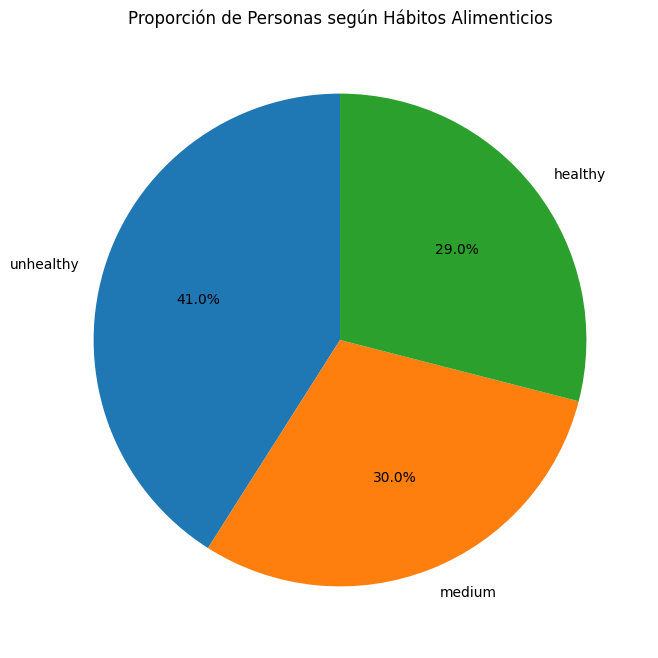

In [17]:
conteo_habitos = df['Dietary Habits'].value_counts()

#Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(conteo_habitos, labels=conteo_habitos.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Personas según Hábitos Alimenticios')
plt.show()


Busco el promedio de la calidad del sueño agrupado según los hábitos alimenticios para encontrar si hay alguna relación entre estas dos variables.

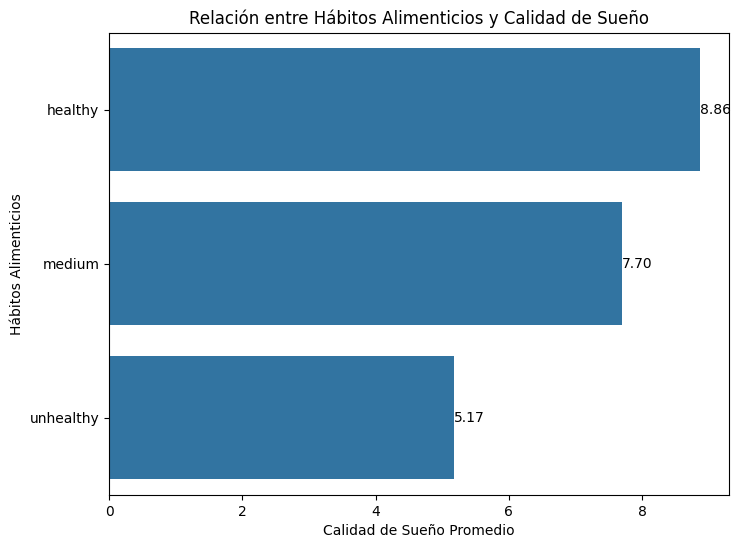

In [13]:
# Promedio de calidad de sueño por hábitos alimenticios
calidad_sueño_por_habito = df.groupby('Dietary Habits')['Sleep Quality'].mean().sort_values(ascending=False)

#Gráfico de barras
plt.figure(figsize=(8,6))
ax = sns.barplot(y='Dietary Habits', x='Sleep Quality', data=df, errorbar =None,
                 order=calidad_sueño_por_habito.index)

for index, value in enumerate(calidad_sueño_por_habito):
    plt.text(value, index, f'{value:.2f}', va='center')

#Etiquetas y Titulos
plt.ylabel('Hábitos Alimenticios')
plt.xlabel('Calidad de Sueño Promedio')
plt.title('Relación entre Hábitos Alimenticios y Calidad de Sueño')
plt.show()


Aquí creo un gráfico de torta que revele la proporción de personas que usan medicamentos.

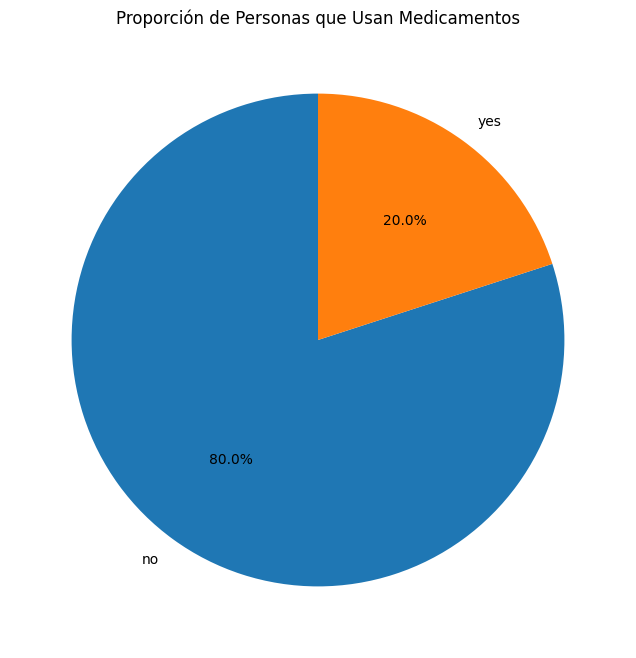

In [14]:
#Se cuentan a las personas que usan medicamentos
conteo_medicamentos = df['Medication Usage'].value_counts()

#Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(conteo_medicamentos, labels=conteo_medicamentos.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Personas que Usan Medicamentos')
plt.show()


Finalmente creo un gráfico para obtener el promedio de la calidad de sueño según el uso de medicación. Esto sirve para ver si hay alguna relación entre las dos variables

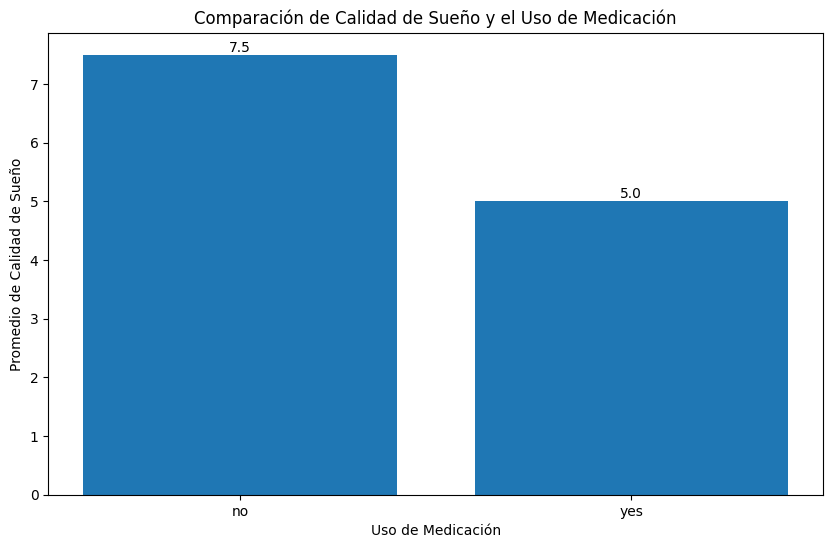

In [15]:
promedio3 = df.groupby('Medication Usage')['Sleep Quality'].mean()

plt.figure(figsize=(10, 6))
bars= plt.bar(promedio3.index, promedio3.values)
plt.title('Comparación de Calidad de Sueño y el Uso de Medicación')
plt.xlabel('Uso de Medicación')
plt.ylabel('Promedio de Calidad de Sueño')

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

# CONCLUSIONES


Después de realizar un análisis exploratorio de los datos, podemos responder las preguntas realizadas al comienzo del análisis.<br>


---


¿Existe una correlación entre el nivel de actividad física diaria y la calidad del sueño?<br>
**Respuesta:** Si, hay una correlación positiva fuerte (0.88), por lo que podemos decir que entre mayor sea la actividad física que realiza una persona, mayor será la calidad del sueño.<br><br>


---


¿Cómo varía la calidad del sueño entre diferentes grupos de edad?<br>
**Respuesta:** Podemos observar que las personas entre 20-30 años tiene una buena calidad de sueño, con un promedio de 8.7, seguido de aquellos entre 30-40 años, con un promedio de 7.36, por último están las personas de 40-50 años con un promedio de calidad de sueño de 5.3.<br><br>


---


¿Las personas con hábitos alimenticios saludables tienden a tener una mejor calidad de sueño que aquellas con hábitos menos saludables?<br>
**Respuesta:** Si, como vimos en el gráfico de barras, las personas con hábitos saludables tienden a tener una mejor calidad del sueño (promedio de 8.86), mientras que aquellas que tienen hábitos malsanos tienen una peor calidad de sueño (promedio de 5.17).<br><br>


---


¿Las personas que toman medicamentos tienen peor calidad de sueño que aquellas que no los toman?<br>
**Respuesta:** Si, las personas que consumen medicamentos tienen una peor calidad de sueño que aquellos que no las consumen. Esto se puede ver en el gráfico de barras.